<a href="https://colab.research.google.com/github/stinh/Tiba_03_Image-recognition/blob/main/00_practice_20211021_Image_recognition_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


影片製成

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time
 
p1=cv2.VideoWriter("1.mp4", cv2.VideoWriter_fourcc(*'MP4V'), 24, (500,500)) # 將以下繪圖過程寫入影片(製成影片)1.mp4 #24那個數值是每秒畫格數，數字越大，動畫越快
 
m1 = np.full((500, 500, 3), (255,255,255), np.uint8) # 建立圖片(底圖/畫布)，如果在迴圈內，一次只會做一個塗，在迴圈外，圖案會堆疊
for w in range(5,250,10): #range第三個數值，成長值會影響影片速度，數字越大，動畫越快
  dp.clear_output(True) # 清除每次畫的圓
  cv2.circle(m1, (250,250), w, (255,29,120), 1)
  cv2_imshow(m1)
  p1.write(m1)
  time.sleep(0.3) # 此指令對影片速度沒影響

p1.release() # 釋放效能，如果不寫此指令，不知道要終止，影片會損毀

影片播放：限colab，先做轉檔 並直接在colab上播放

In [ ]:
!ffmpeg -i 1.mp4 -vcodec libx264 2.mp4 #將來源檔案轉檔為結果檔案(x264格式)

import codecs,base64
import IPython.display as dp
with codecs.open("2.mp4","rb") as f: #以二進式讀2.mp4檔案

# codecs 模塊的 open() 函數可以指定特定的編碼和文件工作。
# 1.mp4的檔案格式無法在網頁播放，轉成2.mp4就可以播放

  r = base64.b64encode(f.read()).decode() #將影片轉為base64格式

dp.HTML(f'<video src="data:video/mp4;base64,{r}" controls />') #將影片寫入html格式，確認能否在網頁播放



影片讀取(預覽播放)：通用


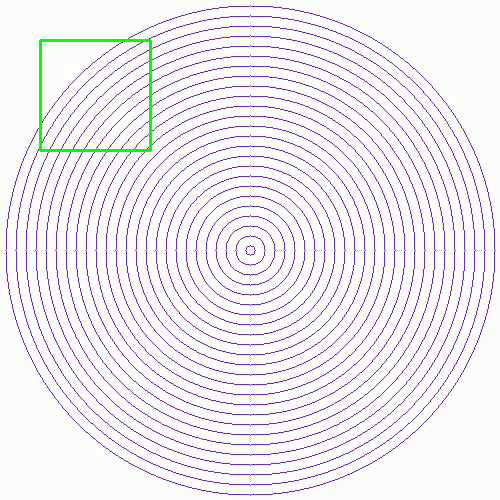

In [ ]:
p1 = cv2.VideoCapture("1.mp4") #取得影片來源

while p1.isOpened()==True: #判斷影像來源是否有開啟
  ret, m1 = p1.read() #取得影像(詳細請看講義解釋)
  if ret==True:
    dp.clear_output(True) #清除畫面，等待新輸出
    cv2.rectangle(m1, (40,40), (150,150), (0,255,0), 2) #可以在迴圈內任意加其他繪圖，影片會同時產製繪圖
    cv2_imshow(m1) #顯示圖片
    time.sleep(0.3) #等待時間
  else:
    break

取得影片資訊

In [ ]:
p1=cv2.VideoCapture("1.mp4")


print("寬：",p1.get(3))
print("高：",p1.get(4))
print("每秒的影格數FPS：",p1.get(5)) #製圖設定的影格，每秒的格數
print("影片的總影格數：",p1.get(7)) #迴圈總共畫了幾次

print("當前的影格：",p1.get(1)) #還沒製圖，所以放在迴圈外沒有意義

while p1.isOpened()==True:
  print("當前的影格：",p1.get(1)) #放在迴圈內才會知道現在正在畫哪張圖
  ret, m1=p1.read()
  if ret==True:
    cv2.rectangle(m1, (40,40), (150,150), (0,255,0), 2)
  else:
    break

In [ ]:
p1=cv2.VideoCapture("1.mp4")
print("寬：",p1.get(3))
print("高：",p1.get(4))
print("FPS：",p1.get(5))
print("影片的總影格數：",p1.get(7))

p1.set(1,20)  # 指定從第20影格開始執行以下迴圈

while p1.isOpened()==True:
  print("當前的影格：",p1.get(1))
  ret, m1=p1.read()
  if ret==True:
    dp.clear_output(True)
    cv2.rectangle(m1, (40,40), (150,150), (0,255,0), 2)
    cv2_imshow(m1)
    time.sleep(0.3)
  else:
    break

已知影片資訊，讀取影片可以改用for迴圈

In [ ]:
p1=cv2.VideoCapture("1.mp4")
if p1.isOpened()==True: 
  for i in range(0,int(p1.get(7)),1): #已知總影格數，可以用for迴圈設定。#get(7)取到的是浮點數，要用int轉成整數
    ret, m1=p1.read()
    dp.clear_output(True)
    cv2.rectangle(m1, (40,40), (150,150), (0,255,0), 2)
    cv2_imshow(m1)
    time.sleep(0.3)

圖像運算

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

# ====================== 圖像相加(變亮) ====================== 
m1 = cv2.imread("1.jpg",1) #要先上傳一張1.jpg檔案才讀的到

# m3 、m4 兩種寫法都可以

m2 = np.full(m1.shape,165,np.uint8) #做一張同類型的底圖

m3 = cv2.add(m1, (0,10,120,0))  #(G,B,R,色彩空間) 色彩空間可為任何數字(不會做運算)，如為-1，則為透明。如為有透明的PNG，色彩空間才會有意義。
m4 = cv2.add(m1, m2)

# cv2_imshow(m1)
# cv2_imshow(m2)
# cv2_imshow(m3)
# cv2_imshow(m4)

# ====================== 圖像相減(變暗) ====================== 
m5 = cv2.subtract(m1, m2)  #(G,B,R,色彩空間) 色彩空間可為任何數字(不會做運算)，如為-1，則為透明。如為有透明的PNG，色彩空間才會有意義。

# cv2_imshow(m5)

# ====================== 圖像相減取絕對值(可能會有負片效果) ====================== 
m6 = cv2.absdiff(m1, m2)  #(G,B,R,色彩空間) 色彩空間可為任何數字(不會做運算)，如為-1，則為透明。如為有透明的PNG，色彩空間才會有意義。

# cv2_imshow(m6)

# ====================== 圖像乘法(瞬間變亮)、除法(瞬間變暗) ====================== 

m7 = cv2.divide(m1, m2)
m8 = cv2.multiply(m1, m2)

cv2_imshow(m7)
cv2_imshow(m8)


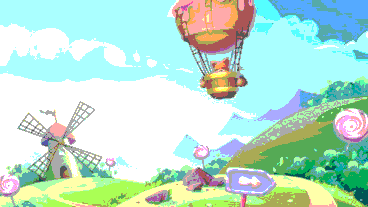

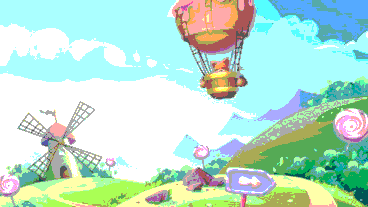

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

# ====================== 圖像乘除(常併用(先除後乘)，簡化資源(減少色相、減少占用資源)) ====================== 

m1=cv2.imread("2.png",1)
m3=cv2.divide(m1, (85,85,85,0)) #先決定要幾個色相 255/85 會產生 0,1,2,3 四種色相
m3=cv2.multiply(m3, (85,85,85,0)) #乘回去再製圖 限制用 0,85,170,255 四種色相製圖

#所以每張圖的顏色組成變成4*4*4共有64種顏色（不算透明度的話)

cv2_imshow(m1)
cv2_imshow(m3)

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

# ====================== not運算(轉為相反色相：對比色) ====================== 

m1 = cv2.imread("1.jpg",1)
m2 = cv2.bitwise_not(m1)
cv2_imshow(m1)
cv2_imshow(m2)
# ====================== 利用numpuy陣列做運算 ====================== 

# m1=cv2.imread("1.jpg",1)
# m3=m1+120+255 # 運算單值小於255，運算結果會從另一端繼續計算 
# m3=m1+500 #運算單值大於255，則轉為矩陣計算

# cv2_imshow(m1)
# cv2_imshow(m2)
# cv2_imshow(m3)
# print(m2)
# print(m3)

圖像轉變

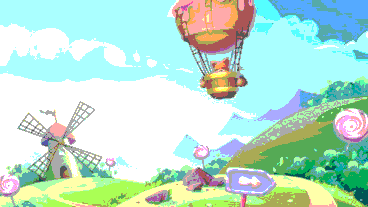

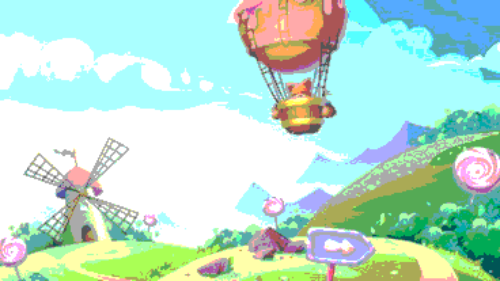

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("2.png",1)

# ====================== 非等比例縮放 ====================== 

m2=cv2.resize(m1, (500,150))  #直接指定新圖的(寬,高)

# cv2_imshow(m1)
# cv2_imshow(m2)

# ====================== 等比例縮放 ====================== 

# 先指定以高或寬為主，此例設定為：等比例縮放圖片寬至500
# 計算新高，以圖層多為陣列，第一維[0]是高，第二維[1]是寬
# w1:w2 = h1:h2， h2 = h1 / (w1/w2)
w = 500 
h = int(m1.shape[0]/(m1.shape[1]/w)) 
m3 = cv2.resize(m1, (w,h))
cv2_imshow(m1)
cv2_imshow(m3)



圖像翻轉 及 旋轉

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1 = cv2.imread("2.png",1)

# ====================== 圖像翻轉 ====================== 

m2 = cv2.flip(m1, -1) # 翻轉方式：1(左右翻轉)、0(上下翻轉)、-1(上下左右皆翻轉)

cv2_imshow(m1)
cv2_imshow(m2)

# ====================== 圖像旋轉 ====================== 

# m3 = cv2.warpAffine(m1, cv2.getRotationMatrix2D((10,70), 45, 0.5), (300,150))
m3=cv2.warpAffine(m1, cv2.getRotationMatrix2D((200,200), 45, 0.5), (0,0))
cv2_imshow(m3)
#cv2.warpAffine(圖像變數, cv2.getRotationMatrix2D(旋轉中心座標, 旋轉角度, 縮放比例), 輸出底圖圖像大小(寬,高)
#以圖片(10,70)作為旋轉點，例如鉚釘釘在此點作旋轉
cv2_imshow(m3)


區域裁切、複製和貼上

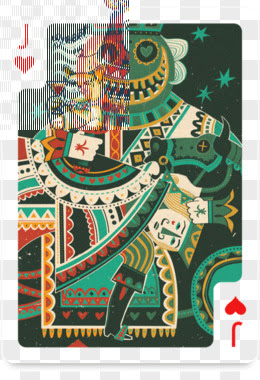

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time


m1=cv2.imread("1.jpg",1)
m2=cv2.imread("2.jpg",1)

# ====================== 圖像裁切(擷取) ====================== 

# m3=m1[50:150,50:170]
# cv2_imshow(m1)
# cv2_imshow(m3)

# ====================== 圖像填塞 ====================== 

# 先將m1裁切，在m2上挖相同大小的洞，再把裁後的m1塞到m2洞裡

# m2[20:100,10:95] = m1[50:130,150:235]
# cv2_imshow(m2)


# ====================== 貼上(貼合) ====================== 

# m2[:m1.shape[0],:m1.shape[1]]=m1 #把第一張圖貼到第二張圖上面 (圖1必須小於圖2)
# m2[:int(m1.shape[0]/2),:int(m1.shape[1])]=m1[:int(m1.shape[0]/2),:m1.shape[1]] #寬距、高距須能相容
# m2[:int(m1.shape[0]/2),:int(m1.shape[1]/2)]=m1[:int(m1.shape[0]/2),:int(m1.shape[1]/2)]


# cv2_imshow(m2)
print("")

# ====================== 網格貼上(貼合) ====================== 

# m2[:m1.shape[0]:2,:m1.shape[1]:2]=m1[::2,::2] #多了第三位數:2
m2[:int(m1.shape[0]/2):1,:int(m1.shape[1]/2):2]=m1[:int(m1.shape[0]/2):1,:int(m1.shape[1]/2):2]
cv2_imshow(m2)


圖像取單色相

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("1.jpg",1)
m2=cv2.imread("2.jpg",1)

cv2_imshow(m1[:,:,0]) #B  #[高,寬,(BGR)] => [:,:,0]==> :指不做篩選，略過高、寬，篩出B結果
# print(m1[:,:,0].shape) # 印出 高、寬
# print(m1[:,:,0]) #印出 B的數值

cv2_imshow(m1[:,:,1]) #G
cv2_imshow(m1[:,:,2]) #R

print("") # 印空格

cv2_imshow(m1)


白平衡
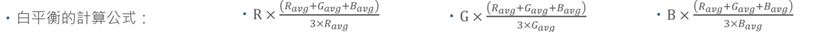

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=cv2.imread("3.png",1)

Bavg=m1[:,:,0].mean()
Gavg=m1[:,:,1].mean()
Ravg=m1[:,:,2].mean()
Avg = (Bavg+Gavg+Ravg)/3

m2=m1.copy()

m2[:,:,0]=cv2.multiply(m1[:,:,0], (Avg/Bavg))
m2[:,:,1]=cv2.multiply(m1[:,:,1], (Avg/Gavg))
m2[:,:,2]=cv2.multiply(m1[:,:,2], (Avg/Ravg))

cv2_imshow(m1)
cv2_imshow(m2)
